# An√°lise Explorat√≥ria e de Correla√ß√£o de √çndices Socioecon√¥micos dos Estados Brasileiros

# An√°lise de Indicadores Socioecon√¥micos dos Estados Brasileiros

# Introdu√ß√£o

O Brasil √© um pa√≠s marcado por uma profunda **diversidade social, econ√¥mica e territorial**, o que torna o estudo do seu desenvolvimento humano um desafio multidimensional. A coexist√™ncia de realidades contrastantes, grandes centros urbanos com alto n√≠vel de renda e escolaridade versus regi√µes com infraestrutura limitada e baixos indicadores sociais, evidencia a complexidade dos fatores que moldam o bem-estar da popula√ß√£o.

Neste projeto, buscou-se compreender **como diferentes vari√°veis socioecon√¥micas se relacionam com os componentes do √çndice de Desenvolvimento Humano Municipal (IDHM)** ‚Äî Renda, Educa√ß√£o e Longevidade ‚Äî e de que forma esses fatores refletem as desigualdades estruturais do pa√≠s. Por meio da an√°lise de correla√ß√£o entre dezenas de indicadores censit√°rios e econ√¥micos, foi poss√≠vel identificar os **agentes e fen√¥menos que mais impactam o desenvolvimento humano no Brasil**.

A abordagem quantitativa adotada permitiu explorar padr√µes de associa√ß√£o entre renda per capita, formaliza√ß√£o do trabalho, escolaridade e outros indicadores de bem-estar, destacando a interdepend√™ncia entre as dimens√µes sociais. Al√©m disso, ao observar as vari√°veis desagregadas por contexto **urbano e rural**, foi poss√≠vel visualizar nuances importantes sobre a diversidade brasileira ‚Äî revelando como o territ√≥rio influencia oportunidades, condi√ß√µes de vida e acesso a direitos fundamentais.

Assim, este estudo se prop√µe n√£o apenas a analisar o IDHM e seus determinantes, mas tamb√©m a **refletir sobre as desigualdades regionais e sociais que comp√µem o mosaico brasileiro**, contribuindo para uma compreens√£o mais ampla dos fen√¥menos que limitam (ou promovem) o desenvolvimento humano em diferentes contextos do pa√≠s.

---

##  1. Importa√ß√£o de Bibliotecas

Nesta se√ß√£o, s√£o importadas as bibliotecas necess√°rias para a manipula√ß√£o, an√°lise e visualiza√ß√£o dos dados.  
As principais s√£o **pandas** e **numpy** para tratamento de dados, e **matplotlib** e **seaborn** para visualiza√ß√£o.  
Al√©m disso, s√£o inclu√≠das algumas bibliotecas auxiliares espec√≠ficas do ambiente **Google Colab** e utilit√°rios gerais.
python
Copiar c√≥digo


In [112]:
# Bibliotecas essenciais para manipula√ß√£o e an√°lise de dados
import pandas as pd
import numpy as np
from functools import reduce

# Bibliotecas para visualiza√ß√£o e an√°lise de correla√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas auxiliares/espec√≠ficas
from google.colab import files # Mantenha se estiver usando o Google Colab para upload
from collections import defaultdict
import re

## 2. Carregamento dos Datasets

Nesta etapa, s√£o carregados os **oito conjuntos de dados** utilizados na an√°lise.  
Cada dataset representa um aspecto socioecon√¥mico dos estados brasileiros:

1. **IDH**  
2. **Educa√ß√£o**  
3. **Habita√ß√£o, Meio Ambiente e Participa√ß√£o na Pol√≠tica**  
4. **Popula√ß√£o**  
5. **Renda**  
6. **Sa√∫de**  
7. **Trabalho**  
8. **Vulnerabilidade**

Os arquivos foram carregados manualmente atrav√©s da fun√ß√£o `files.upload()` do Google Colab e, em seguida, armazenados em `DataFrames` individuais para facilitar a explora√ß√£o.


### 2.1 Dataset: IDH

In [2]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_IDH = pd.read_excel(fn)

# primeiras linhas dos dados de IDH
display(df_IDH.head())

Saving UF_IDH.xlsx to UF_IDH.xlsx
Arquivo "UF_IDH.xlsx" carregado com sucesso


Territorialidades Esperan√ßa de vida ao nascer 2010  Popula√ß√£o total 2010  \
0            Brasil                            73.94           190755799.0   
1              Acre                            71.63              733559.0   
2           Alagoas                            70.32             3120494.0   
3             Amap√°                             73.8              669526.0   
4          Amazonas                             73.3             3483985.0   

   Popula√ß√£o rural 2010  Popula√ß√£o urbana 2010  \
0            29830007.0            160925792.0   
1              201280.0               532279.0   
2              822634.0              2297860.0   
3               68490.0               601036.0   
4              728495.0              2755490.0   

   Popula√ß√£o de 0 a 1 ano de idade 2010  Mortalidade infantil 2010  \
0                             2707991.0                      16.70   
1                               14588.0                      23.01   
2                               53297.0                      28.40   
3                               14090.0                      15.14   
4                               73242.0                      17.01   

   Popula√ß√£o de 1 a 3 anos de idade 2010  Popula√ß√£o de 4 anos de idade 2010  \
0                              8196384.0                          2864361.0   
1                                46757.0                            15931.0   
2                               162101.0                            56372.0   
3                                41600.0                            14121.0   
4                               221213.0                            76190.0   

   Popula√ß√£o de 5 anos de idade 2010  ...  Desagrega√ß√£o URBANO IDHM PNAD  \
0                          2925979.0  ...                            NaN   
1                            16315.0  ...                            NaN   
2                            56759.0  ...                            NaN   
3                            13990.0  ...                            NaN   
4                            77817.0  ...                            NaN   

   Desagrega√ß√£o URBANO IDHM Ajustado √† Desigualdade PNAD  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   Desagrega√ß√£o URBANO IDHM Longevidade Ajustado √† Desigualdade PNAD  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                                NaN                   
4                                                NaN                   

   Desagrega√ß√£o URBANO IDHM Educa√ß√£o Ajustado √† Desigualdade PNAD  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Desagrega√ß√£o URBANO IDHM Renda Ajustado √† Desigualdade PNAD  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Desagrega√ß√£o URBANO IDHM Ajustado √† Desigualdade - Perda pela desigualdade PNAD  \
0                                                NaN                                 
1                                                NaN              

### 2.2 Dataset: Educa√ß√£o

In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_educacao = pd.read_excel(fn)

# primeiras linhas dos dados de educa√ß√£o
display(df_educacao.head())

Saving UF_Educa√ß√£o.xlsx to UF_Educa√ß√£o.xlsx
Arquivo "UF_Educa√ß√£o.xlsx" carregado com sucesso


Territorialidades Taxa de analfabetismo - 11 a 14 anos de idade 2010  \
0            Brasil                                               3.24   
1              Acre                                               6.64   
2           Alagoas                                               8.96   
3             Amap√°                                               3.81   
4          Amazonas                                               6.54   

   % de 5 a 6 anos de idade na escola 2010  \
0                                    91.12   
1                                    78.72   
2                                    88.74   
3                                    82.79   
4                                    80.52   

   % de 11 a 13 anos de idade nos anos finais do ensino fundamental ou com ensino fundamental completo 2010  \
0                                              84.86                                                          
1                                              75.96                                                          
2                                              81.57                                                          
3                                              80.89                                                          
4                                              75.33                                                          

   % de 18 a 20 anos de idade com ensino m√©dio completo 2010  \
0                                              41.01           
1                                              31.98           
2                                              25.86           
3                                              35.73           
4                                              28.76           

   Taxa de analfabetismo - 15 a 17 anos de idade 2010  \
0                                               2.20    
1                                               4.47    
2                                               6.13    
3                                               2.28    
4                                               3.96    

   Taxa de analfabetismo - 18 a 24 anos de idade 2010  \
0                                               2.61    
1                                               5.87    
2                                               8.43    
3                                               2.38    
4                                               4.25    

   Taxa de analfabetismo - 25 a 29 anos de idade 2010  \
0                                               3.96    
1                                               9.03    
2                                              14.83    
3                                               3.62    
4                                               5.18    

   % de 0 a 5 anos de idade na escola 2010  \
0                                    43.15   
1                                    29.70   
2                                    38.46   
3                                    29.17   
4                                    30.75   

   Taxa de analfabetismo - 25 anos ou mais de idade 2010  ...  \
0                                              11.82      ...   
1                                              21.29      ...   
2                                              30.57      ...   
3                                              11.20      ...   
4                                              12.30      ...   

   Desagrega√ß√£o URBANO Taxa de frequ√™ncia l√≠quida ao ensino fundamental Censo  \
0                                              94.25                            
1                                              92.77                            
2                                              93.43                            
3                                              93.54                            
4                                              92.18                            

   Desagrega√ß√£o URBANO Taxa de frequ

### 2.3 Dataset: Habita√ß√£o, Meio Ambiente e Participa√ß√£o na Pol√≠tica

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_hab_amb_pol = pd.read_excel(fn)

# primeiras linhas dos dados de Habita√ß√£o, Meio Ambiente e Participa√ß√£o na Pol√≠tica
display(df_hab_amb_pol.head())

Saving UF_Habita√ß√£o_MeioAmbiente_Participa√ß√£oPolitica.xlsx to UF_Habita√ß√£o_MeioAmbiente_Participa√ß√£oPolitica.xlsx
Arquivo "UF_Habita√ß√£o_MeioAmbiente_Participa√ß√£oPolitica.xlsx" carregado com sucesso


Territorialidades % da popula√ß√£o em domic√≠lios com √°gua encanada 2010  \
0            Brasil                                              92.72    
1              Acre                                              86.51    
2           Alagoas                                              77.56    
3             Amap√°                                              91.44    
4          Amazonas                                              77.32    

   % da popula√ß√£o que vive em domic√≠lios com banheiro e √°gua encanada 2010  \
0                                              87.16                         
1                                              47.42                         
2                                              75.64                         
3                                              66.38                         
4                                              62.16                         

   % de pessoas em domic√≠lios urbanos com coleta de lixo 2010  \
0                                              97.02            
1                                              93.63            
2                                              96.16            
3                                              96.38            
4                                              92.98            

   % de pessoas em domic√≠lios com energia el√©trica 2010  \
0                                              98.58      
1                                              91.14      
2                                              98.98      
3                                              98.27      
4                                              92.18      

   % da popula√ß√£o que vive em domic√≠lios com densidade superior a 2 pessoas por dormit√≥rio 2010  \
0                                              27.83                                              
1                                              46.05                                              
2                                              35.04                                              
3                                              53.98                                              
4                                              57.95                                              

   % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada 2010  \
0                                               3.42                                              
1                                               9.06                                              
2                                               5.19                                              
3                                               4.77                                              
4                                               7.36                                              

   % de cobertura vegetal natural 2013  Concentra√ß√£o dos focos de calor 2013  \
0                                67.56                               1000.00   
1                                89.19                                 20.44   
2                                14.75                                  5.60   
3                                91.86                                  7.99   
4                                95.61                                 30.94   

   % de vereadores do sexo feminino 2013  ...  \
0                                  13.33  ...   
1                                  14.22  ...   
2                                  15.73  ...   
3                                  19.28  ...   
4                                  11.16  ...   

   Desagrega√ß√£o URBANO % de prefeitos do sexo feminino TSE  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                     

### 2.4 Dataset: Popula√ß√£o

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_populacao = pd.read_excel(fn)

# primeiras linhas dos dados da popula√ß√£o
display(df_populacao.head())

Saving UF_Popula√ß√£o.xlsx to UF_Popula√ß√£o.xlsx
Arquivo "UF_Popula√ß√£o.xlsx" carregado com sucesso


Territorialidades Esperan√ßa de vida ao nascer 2010  Popula√ß√£o total 2010  \
0            Brasil                            73.94           190755799.0   
1              Acre                            71.63              733559.0   
2           Alagoas                            70.32             3120494.0   
3             Amap√°                             73.8              669526.0   
4          Amazonas                             73.3             3483985.0   

   Popula√ß√£o rural 2010  Popula√ß√£o urbana 2010  \
0            29830007.0            160925792.0   
1              201280.0               532279.0   
2              822634.0              2297860.0   
3               68490.0               601036.0   
4              728495.0              2755490.0   

   Popula√ß√£o de 0 a 1 ano de idade 2010  Mortalidade infantil 2010  \
0                             2707991.0                      16.70   
1                               14588.0                      23.01   
2                               53297.0                      28.40   
3                               14090.0                      15.14   
4                               73242.0                      17.01   

   Popula√ß√£o de 1 a 3 anos de idade 2010  Popula√ß√£o de 4 anos de idade 2010  \
0                              8196384.0                          2864361.0   
1                                46757.0                            15931.0   
2                               162101.0                            56372.0   
3                                41600.0                            14121.0   
4                               221213.0                            76190.0   

   Popula√ß√£o de 5 anos de idade 2010  ...  \
0                          2925979.0  ...   
1                            16315.0  ...   
2                            56759.0  ...   
3                            13990.0  ...   
4                            77817.0  ...   

   Desagrega√ß√£o URBANO Popula√ß√£o de 11 a 13 anos de idade PNAD  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Desagrega√ß√£o URBANO Popula√ß√£o de 15 a 17 anos de idade PNAD  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Desagrega√ß√£o URBANO Popula√ß√£o de 15 anos ou mais de idade PNAD  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Desagrega√ß√£o URBANO Popula√ß√£o de 18 anos ou mais de idade PNAD  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Desagrega√ß√£o URBANO Popula√ß√£o de 18 a 20 anos de idade PNAD  \
0                                                NaN             
1                                                NaN             
2                                                NaN             
3                                                NaN             
4                                                NaN             

   Desag

### 2.5 Dataset: Renda

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_renda = pd.read_excel(fn)

# primeiras linhas dos dados da renda
display(df_renda.head())

Saving UF_Renda.xlsx to UF_Renda.xlsx
Arquivo "UF_Renda.xlsx" carregado com sucesso


Territorialidades  \
0            Brasil   
1              Acre   
2           Alagoas   
3             Amap√°   
4          Amazonas   

  % indiv√≠duos pertencentes ao quinto mais pobre da distribui√ß√£o dos indiv√≠duos segundo a renda domiciliar per capita 2010  \
0                                               2.41                                                                         
1                                                1.4                                                                         
2                                               1.85                                                                         
3                                               2.16                                                                         
4                                               1.31                                                                         

   % indiv√≠duos pertencentes aos dois quintos mais pobres da distribui√ß√£o dos indiv√≠duos segundo a renda domiciliar per capita 2010  \
0                                               8.59                                                                                  
1                                               6.89                                                                                  
2                                               7.62                                                                                  
3                                               7.88                                                                                  
4                                               6.40                                                                                  

   % indiv√≠duos pertencentes aos tr√™s quintos mais pobres da distribui√ß√£o dos indiv√≠duos segundo a renda domiciliar per capita 2010  \
0                                              19.23                                                                                  
1                                              16.78                                                                                  
2                                              17.35                                                                                  
3                                              17.82                                                                                  
4                                              15.68                                                                                  

   % indiv√≠duos pertencentes aos quatro quintos mais pobres da distribui√ß√£o dos indiv√≠duos segundo a renda domiciliar per capita 2010  \
0                                              36.60                                                                                    
1                                              34.23                                                                                    
2                                              34.03                                                                                    
3                                              36.04                                                                                    
4                                              32.09                                                                                    

   % indiv√≠duos pertencentes ao quinto mais rico da distribui√ß√£o dos indiv√≠duos segundo a renda domiciliar per capita 2010  \
0                                              63.40                                                                         
1                                              65.77                                                                         
2                                              65.97                                                                         
3                                              63.96                                                                         
4        

### 2.6 Dataset: Sa√∫de

In [7]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_saude = pd.read_excel(fn)

# primeiras linhas dos dados de sa√∫de
display(df_saude.head())

Saving UF_Saude.xlsx to UF_Saude.xlsx
Arquivo "UF_Saude.xlsx" carregado com sucesso


Territorialidades Taxa de mortalidade infantil 2013  \
0            Brasil                             13.39   
1              Acre                              16.4   
2           Alagoas                             16.21   
3             Amap√°                             19.92   
4          Amazonas                             17.22   

   % de nascidos vivos com pelo menos sete consultas de pr√©-natal 2013  \
0                                              62.42                     
1                                              38.42                     
2                                              46.12                     
3                                              31.71                     
4                                              35.28                     

   % de nascidos vivos com baixo peso ao nascer 2013  \
0                                               8.51   
1                                               7.67   
2                                               8.37   
3                                               8.76   
4                                               7.74   

   Taxa bruta de mortalidade 2013  Taxa de mortalidade por homic√≠dios 2013  \
0                            6.00                                    28.31   
1                            4.27                                    30.39   
2                            5.82                                    65.47   
3                            3.64                                    30.61   
4                            3.97                                    31.33   

   Taxa de mortalidade por doen√ßas n√£o transmiss√≠veis 2013  \
0                                             327.34         
1                                             197.30         
2                                             291.04         
3                                             140.95         
4                                             165.10         

   Taxa de mortalidade de mulheres por c√¢ncer da mama 2013  \
0                                              13.84         
1                                               7.76         
2                                               8.46         
3                                               4.63         
4                                               7.93         

   Taxa de mortalidade por c√¢ncer de pr√≥stata 2013  \
0                                            13.99   
1                                             9.75   
2                                            10.44   
3                                             6.25   
4                                             8.56   

   Taxa de incid√™ncia de AIDS 2013  ...  \
0                            11.39  ...   
1                             5.80  ...   
2                             6.70  ...   
3                            10.75  ...   
4                            29.31  ...   

   Desagrega√ß√£o URBANO Taxa de mortalidade de mulheres por c√¢ncer da mama DATASUS  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

   Desagrega√ß√£o URBANO Taxa de mortalidade por c√¢ncer de pr√≥stata DATASUS  \
0                                                NaN                        
1                                                NaN                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

   Desagrega√ß√£o URBANO Taxa de incid√™ncia de AIDS DATASUS  \
0                      

### 2.7 Dataset: Trabalho

In [8]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_trabalho = pd.read_excel(fn)

# primeiras linhas dos dados de trabalho
display(df_trabalho.head())

Saving UF_Trabalho.xlsx to UF_Trabalho.xlsx
Arquivo "UF_Trabalho.xlsx" carregado com sucesso


Territorialidades Taxa de atividade - 10 anos ou mais de idade 2010  \
0            Brasil                                             57.93   
1              Acre                                             53.08   
2           Alagoas                                              49.5   
3             Amap√°                                             56.38   
4          Amazonas                                             53.99   

   Taxa de atividade - 10 a 14 anos de idade 2010  \
0                                            7.53   
1                                           10.32   
2                                            9.02   
3                                            7.72   
4                                           10.95   

   Taxa de atividade - 15 a  17 anos de idade 2010  \
0                                            29.78   
1                                            24.02   
2                                            24.63   
3                                            22.92   
4                                            25.21   

   Taxa de atividade - 18 anos ou mais de idade 2010  \
0                                              66.54   
1                                              64.86   
2                                              58.69   
3                                              69.70   
4                                              65.32   

   Taxa de atividade - 18 a 24 anos de idade 2010  \
0                                           68.05   
1                                           58.94   
2                                           56.25   
3                                           60.57   
4                                           57.48   

   Taxa de atividade - 25 a 29 anos de idade 2010  \
0                                           78.23   
1                                           71.20   
2                                           67.36   
3                                           74.72   
4                                           70.41   

   Taxa de desocupa√ß√£o - 10 anos ou mais de idade 2010  \
0                                               7.98     
1                                               8.33     
2                                              11.04     
3                                              12.25     
4                                              10.16     

   Taxa de desocupa√ß√£o - 10 a 14 anos de idade 2010  \
0                                             17.30   
1                                             13.10   
2                                             10.84   
3                                             21.57   
4                                             13.98   

   Taxa de desocupa√ß√£o - 15 a 17 anos de idade 2010  ...  \
0                                             24.19  ...   
1                                             25.65  ...   
2                                             23.65  ...   
3                                             27.44  ...   
4                                             21.88  ...   

   Desagrega√ß√£o URBANO % dos ocupados no setor de constru√ß√£o Censo  \
0                                               7.93                 
1                                               9.34                 
2                                               7.59                 
3                                               8.54                 
4                                               7.41                 

   Desagrega√ß√£o URBANO % dos ocupados no setor com√©rcio Censo  \
0                                              17.10            
1                                              17.06            
2                                              18.46            
3                                              18.40            
4                                              17.48            

   Desagrega√ß√£o URBANO % dos ocupados no setor de servi√ßos Censo  \
0     

### 2.8 Dataset: Vulnerabilidade

In [9]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" carregado com sucesso'.format(name=fn))
  df_vulnerabilidade = pd.read_excel(fn)

# primeiras linhas dos dados de vulnerabilidade
display(df_vulnerabilidade.head())

Saving UF_Vulnerabilidade.xlsx to UF_Vulnerabilidade.xlsx
Arquivo "UF_Vulnerabilidade.xlsx" carregado com sucesso


Territorialidades  \
0            Brasil   
1              Acre   
2           Alagoas   
3             Amap√°   
4          Amazonas   

  % de mulheres de 10 a 17 anos de idade que tiveram filhos 2010  \
0                                               2.89               
1                                               4.92               
2                                                3.8               
3                                               4.37               
4                                               5.19               

   % de m√£es chefes de fam√≠lia, sem fundamental completo e com pelo menos um filho menor de 15 anos de idade 2010  \
0                                              17.23                                                                
1                                              28.72                                                                
2                                              26.49                                                                
3                                              27.37                                                                
4                                              25.77                                                                

   % de crian√ßas que vivem em domic√≠lios em que nenhum dos moradores tem o ensino fundamental completo 2010  \
0                                              30.39                                                          
1                                              41.14                                                          
2                                              49.55                                                          
3                                              24.29                                                          
4                                              33.69                                                          

   % de crian√ßas de 0 a 5 anos de idade que n√£o frequentam a escola 2010  \
0                                              56.85                       
1                                              70.30                       
2                                              61.54                       
3                                              70.83                       
4                                              69.25                       

   % de crian√ßas de 6 a 14 anos de idade que n√£o frequentam a escola 2010  \
0                                               3.31                        
1                                               8.17                        
2                                               4.76                        
3                                               4.66                        
4                                               8.80                        

   % de pessoas em domic√≠lios em que nenhum morador tem ensino fundamental completo 2010  \
0                                              24.92                                       
1                                              33.21                                       
2                                              40.34                                       
3                                              18.76                                       
4                                              26.49                                       

   % de 15 a 24 anos de idade que n√£o estudam nem trabalham em domic√≠lios vulner√°veis √† pobreza 2010  \
0                                              11.61                                                   
1                                              17.41                                                   
2                                              21.65                                                   
3                                              16.02                                                   
4                                              17.09                         

## 3. Tratamento dos Dados
Nesta etapa, s√£o realizadas opera√ß√µes de limpeza e padroniza√ß√£o nos oito datasets, com o objetivo de preparar os dados para an√°lise.

As principais a√ß√µes incluem:
1. **Remo√ß√£o das linhas que n√£o correspondem a um estado**, mantendo apenas as informa√ß√µes estaduais;
2. **Elimina√ß√£o de colunas com todos os valores ausentes (NaN)**;
3. **Remo√ß√£o de colunas duplicadas referentes ao mesmo indicador em diferentes anos**, mantendo apenas a vers√£o mais antiga de cada indicador.
4. **Preenchimento dos Valores Ausentes** em algumas colunas de determinados estados.


### 3.1 Remo√ß√£o da linha "Brasil" e de outras (que n√£o s√£o territ√≥rio do Brasil) de todos os DataFrames

In [167]:
# Lista de dataframes originais
dfs_originais = [
    df_IDH,
    df_educacao,
    df_hab_amb_pol,
    df_populacao,
    df_renda,
    df_saude,
    df_trabalho,
    df_vulnerabilidade
]

# Remove a linha onde 'Territorialidades' √© 'Brasil' e as √∫ltimas 3 linhas de cada dataframe
dfs_processados = [df[df['Territorialidades'] != 'Brasil'].copy().iloc[:-3] for df in dfs_originais]

# Atualiza as vari√°veis originais
df_IDH, df_educacao, df_hab_amb_pol, df_populacao, df_renda, df_saude, df_trabalho, df_vulnerabilidade = dfs_processados

print("Linha com 'Territorialidades' igual a 'Brasil' e as √∫ltimas 3 linhas removidas de todos os dataframes.")

Linha com 'Territorialidades' igual a 'Brasil' e as √∫ltimas 3 linhas removidas de todos os dataframes.


### 3.2 Remo√ß√£o de colunas com todos os valores ausentes (NaN)

Alguns datasets possuem colunas totalmente vazias.  
Essas colunas n√£o trazem informa√ß√£o √∫til, portanto s√£o eliminadas.

In [168]:
# retirando colunas com todos os valores NaN do df_IDH
df_IDH_limpo = df_IDH.dropna(axis=1, how='all')
df_educacao_limpo = df_educacao.dropna(axis=1, how='all')
df_hab_amb_pol_limpo = df_hab_amb_pol.dropna(axis=1, how='all')
df_populacao_limpo = df_populacao.dropna(axis=1, how='all')
df_renda_limpo = df_renda.dropna(axis=1, how='all')
df_saude_limpo = df_saude.dropna(axis=1, how='all')
df_trabalho_limpo = df_trabalho.dropna(axis=1, how='all')
df_vulnerabilidade_limpo = df_vulnerabilidade.dropna(axis=1, how='all')

print(f"IDH: ")
print(f"N√∫mero de colunas antes: {df_IDH.shape[1]}")
print(f"N√∫mero de colunas depois: {df_IDH_limpo.shape[1]}\n")

print(f"Educa√ß√£o: ")
print(f"N√∫mero de colunas antes: {df_educacao.shape[1]}")
print(f"N√∫mero de colunas depois: {df_educacao_limpo.shape[1]}\n")

print(f"Habita√ß√£o, Meio Ambiente e Participa√ß√£o na Pol√≠tica: ")
print(f"N√∫mero de colunas antes: {df_hab_amb_pol.shape[1]}")
print(f"N√∫mero de colunas depois: {df_hab_amb_pol_limpo.shape[1]}\n")

print(f"Popula√ß√£o: ")
print(f"N√∫mero de colunas antes: {df_populacao.shape[1]}")
print(f"N√∫mero de colunas depois: {df_populacao_limpo.shape[1]}\n")

print(f"Renda: ")
print(f"N√∫mero de colunas antes: {df_renda.shape[1]}")
print(f"N√∫mero de colunas depois: {df_renda_limpo.shape[1]}\n")

print(f"Sa√∫de: ")
print(f"N√∫mero de colunas antes: {df_saude.shape[1]}")
print(f"N√∫mero de colunas depois: {df_saude_limpo.shape[1]}\n")

print(f"Trabalho: ")
print(f"N√∫mero de colunas antes: {df_trabalho.shape[1]}")
print(f"N√∫mero de colunas depois: {df_trabalho_limpo.shape[1]}\n")

print(f"Vulnerabilidade: ")
print(f"N√∫mero de colunas antes: {df_vulnerabilidade.shape[1]}")
print(f"N√∫mero de colunas depois: {df_vulnerabilidade_limpo.shape[1]}\n")

IDH: 
N√∫mero de colunas antes: 355
N√∫mero de colunas depois: 273

Educa√ß√£o: 
N√∫mero de colunas antes: 190
N√∫mero de colunas depois: 140

Habita√ß√£o, Meio Ambiente e Participa√ß√£o na Pol√≠tica: 
N√∫mero de colunas antes: 58
N√∫mero de colunas depois: 31

Popula√ß√£o: 
N√∫mero de colunas antes: 289
N√∫mero de colunas depois: 237

Renda: 
N√∫mero de colunas antes: 217
N√∫mero de colunas depois: 153

Sa√∫de: 
N√∫mero de colunas antes: 49
N√∫mero de colunas depois: 17

Trabalho: 
N√∫mero de colunas antes: 106
N√∫mero de colunas depois: 102

Vulnerabilidade: 
N√∫mero de colunas antes: 100
N√∫mero de colunas depois: 78



### 3.3 Remo√ß√£o de colunas duplicadas de diferentes anos

Alguns indicadores aparecem repetidos em diferentes colunas, apenas variando o ano (por exemplo: *‚ÄúIDHM 2010‚Äù* e *‚ÄúIDHM 2012‚Äù*).

Para manter a consist√™ncia, foi aplicada uma filtragem que **mant√©m apenas o indicador mais antigo** (primeiro ano dispon√≠vel) de cada grupo de colunas.


In [169]:
# Fun√ß√£o para extrair o nome base e o ano de uma coluna
def extract_base_name_and_year(col_name):
    match = re.match(r'(.*)\s(\d{4})$', col_name)
    if match:
        return match.groups()
    return col_name, None

# Dicion√°rio com os dataframes limpos
cleaned_dfs = {
    'df_IDH_limpo': df_IDH_limpo,
    'df_educacao_limpo': df_educacao_limpo,
    'df_hab_amb_pol_limpo': df_hab_amb_pol_limpo,
    'df_populacao_limpo': df_populacao_limpo,
    'df_renda_limpo': df_renda_limpo,
    'df_saude_limpo': df_saude_limpo,
    'df_trabalho_limpo': df_trabalho_limpo,
    'df_vulnerabilidade_limpo': df_vulnerabilidade_limpo
}

# Dicion√°rio para armazenar os dataframes filtrados
filtered_dfs = {}

# Aplica a filtragem para cada dataframe
for df_name, df in cleaned_dfs.items():
    cols_to_drop = []
    base_name_years = defaultdict(list)

    for col in df.columns:
        base_name, year = extract_base_name_and_year(col)
        if year:
            base_name_years[base_name].append((year, col))

    for base_name, year_cols in base_name_years.items():
        if len(year_cols) > 1:
            year_cols.sort()  # mant√©m a coluna com o ano mais antigo
            cols_to_drop.extend([col for year, col in year_cols[1:]])

    # Remove as colunas duplicadas
    filtered_df = df.drop(columns=cols_to_drop)
    filtered_dfs[df_name + '_filtered'] = filtered_df

    # Relat√≥rio resumido
    print(f"\n {df_name}")
    print(f" - Colunas antes: {df.shape[1]}")
    print(f" - Colunas depois: {filtered_df.shape[1]}")
    print(f" - Colunas removidas:")
    if cols_to_drop:
        for col in cols_to_drop:
            print(f"   ‚Ä¢ {col}")
    else:
        print("   Nenhuma coluna removida.")
    print("-" * 50)


 df_IDH_limpo
 - Colunas antes: 273
 - Colunas depois: 253
 - Colunas removidas:
   ‚Ä¢ Esperan√ßa de vida ao nascer 2012
   ‚Ä¢ Popula√ß√£o total 2012
   ‚Ä¢ Mortalidade infantil 2012
   ‚Ä¢ Popula√ß√£o de 15 a 17 anos de idade 2012
   ‚Ä¢ Popula√ß√£o de 18 a 24 anos de idade 2012
   ‚Ä¢ Popula√ß√£o de 15 anos ou mais de idade 2012
   ‚Ä¢ Popula√ß√£o de 18 anos ou mais de idade 2012
   ‚Ä¢ Popula√ß√£o de 25 anos ou mais de idade 2012
   ‚Ä¢ Popula√ß√£o de 65 anos ou mais de idade 2012
   ‚Ä¢ Popula√ß√£o total em domic√≠lios particulares permanentes 2012
   ‚Ä¢ Popula√ß√£o total em domic√≠lios particulares permanentes, exceto com renda nula 2012
   ‚Ä¢ IDHM 2012
   ‚Ä¢ IDHM Renda 2012
   ‚Ä¢ IDHM Longevidade 2012
   ‚Ä¢ IDHM Educa√ß√£o 2012
   ‚Ä¢ Sub√≠ndice de frequ√™ncia escolar - IDHM Educa√ß√£o 2012
   ‚Ä¢ Sub√≠ndice de escolaridade - IDHM Educa√ß√£o 2012
   ‚Ä¢ Raz√£o de depend√™ncia 2012
   ‚Ä¢ Taxa de envelhecimento 2012
   ‚Ä¢ Renda per capita 2012
----------------------------

### 3.4 An√°lise de Valores Ausentes (NaN)

Ap√≥s as etapas anteriores de limpeza, √© importante verificar se ainda existem **valores ausentes (NaN)** nos datasets.  
A an√°lise a seguir percorre todos os DataFrames para identificar:

- Quais colunas ainda possuem valores nulos;  
- Em quais **territorialidades (estados)** esses valores est√£o presentes;  
- E quantos valores ausentes existem por coluna.


In [170]:
# Dicion√°rio contendo os dataframes originais
original_dfs = {
    'df_IDH': df_IDH_limpo,
    'df_educacao': df_educacao_limpo,
    'df_hab_amb_pol': df_hab_amb_pol_limpo,
    'df_populacao': df_populacao_limpo,
    'df_renda': df_renda_limpo,
    'df_saude': df_saude_limpo,
    'df_trabalho': df_trabalho_limpo,
    'df_vulnerabilidade': df_vulnerabilidade_limpo
}

print("--- An√°lise de Valores Nulos (NaN) nos DataFrames Originais ---\n")

# Dicion√°rio para armazenar as territorialidades com NaN
all_nan_territorialidades = {}

for df_name, df in original_dfs.items():
    print(f"DataFrame: {df_name}")
    print("-" * (len(df_name) + 11))

    # Remove linhas de metadados e espa√ßos em branco
    df_cleaned = df[~df['Territorialidades'].str.contains('Elabora√ß√£o:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Colunas com pelo menos um NaN
    colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()

    if not colunas_com_nan:
        print(" N√£o h√° valores nulos (NaN) neste DataFrame (ap√≥s remover metadados e linhas em branco).")
    else:
        print("As colunas a seguir cont√™m valores nulos (NaN):")

        # Guarda os resultados por coluna
        territorialidades_nulas_por_coluna = {}

        for coluna in colunas_com_nan:
            if 'Territorialidades' in df_cleaned.columns:
                territorialidades_com_nan = df_cleaned[df_cleaned[coluna].isna()]['Territorialidades'].tolist()
            else:
                territorialidades_com_nan = []

            territorialidades_nulas_por_coluna[coluna] = territorialidades_com_nan

            num_territorialidades = len(territorialidades_com_nan)
            print(f"  - {coluna}: {df_cleaned[coluna].isna().sum()} valores nulos ({num_territorialidades} Territorialidades)")

            if num_territorialidades > 0:
                print(f"    Territorialidades: {', '.join(territorialidades_com_nan)}")
            else:
                print("    Territorialidades: Nenhuma")

        all_nan_territorialidades[df_name] = territorialidades_nulas_por_coluna

    print("\n" + "=" * 50 + "\n")


--- An√°lise de Valores Nulos (NaN) nos DataFrames Originais ---

DataFrame: df_IDH
-----------------
 N√£o h√° valores nulos (NaN) neste DataFrame (ap√≥s remover metadados e linhas em branco).


DataFrame: df_educacao
----------------------
 N√£o h√° valores nulos (NaN) neste DataFrame (ap√≥s remover metadados e linhas em branco).


DataFrame: df_hab_amb_pol
-------------------------
As colunas a seguir cont√™m valores nulos (NaN):
  - % de vereadores do sexo feminino 2013: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - % de prefeitos do sexo feminino 2013: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - Desagrega√ß√£o RURAL % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada Censo: 1 valores nulos (1 Territorialidades)
    Territorialidades: Distrito Federal
  - Desagrega√ß√£o URBANO % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada Censo:

### 3.5 Preenchimento dos Valores Ausentes

Durante a an√°lise anterior, observou-se que alguns estados apresentavam valores ausentes em determinados indicadores ‚Äî em especial, **Distrito Federal** e **Roraima**.

Para manter a coer√™ncia dos dados sem distorcer as m√©dias nacionais, optou-se por preencher os valores ausentes utilizando a **m√©dia da regi√£o geogr√°fica** a que cada estado pertence.  
Essa abordagem preserva a consist√™ncia estat√≠stica entre os estados e evita a exclus√£o de registros importantes.


In [171]:
# DF ‚Üí m√©dia do Centro-Oeste (GO, MT, MS)
# Roraima ‚Üí m√©dia do Norte (AC, AM, AP, PA, RO, TO)

# Dicion√°rio de estados por regi√£o
regioes = {
    'Norte': ['Acre', 'Amap√°', 'Amazonas', 'Par√°', 'Rond√¥nia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Cear√°', 'Maranh√£o', 'Para√≠ba', 'Pernambuco', 'Piau√≠', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Goi√°s', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
    'Sudeste': ['Esp√≠rito Santo', 'Minas Gerais', 'Rio de Janeiro', 'S√£o Paulo'],
    'Sul': ['Paran√°', 'Rio Grande do Sul', 'Santa Catarina']
}

for df_name, df in original_dfs.items():
    print(f"Tratando NaN no {df_name}...")

    # Remove linhas de metadados e espa√ßos vazios
    df_cleaned = df[~df['Territorialidades'].str.contains('Elabora√ß√£o:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Garante que 'Territorialidades' seja o √≠ndice
    df_cleaned.set_index('Territorialidades', inplace=True)

    # Filtra colunas com NaN
    colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()

    if not colunas_com_nan:
        print("‚úÖ Nenhum NaN encontrado. Pulando.\n")
        continue

    # === Distrito Federal ===
    centro_oeste_estados = ['Goi√°s', 'Mato Grosso', 'Mato Grosso do Sul']
    if 'Distrito Federal' in df_cleaned.index:
        for col in colunas_com_nan:
            if pd.isna(df_cleaned.loc['Distrito Federal', col]):
                media_centro_oeste = df_cleaned.loc[centro_oeste_estados, col].mean(skipna=True)
                df_cleaned.loc['Distrito Federal', col] = media_centro_oeste
                print(f"üîß DF: Substitu√≠do NaN em '{col}' pela m√©dia do Centro-Oeste ({media_centro_oeste:.4f})")

    # === Roraima ===
    norte_estados = ['Acre', 'Amap√°', 'Amazonas', 'Par√°', 'Rond√¥nia', 'Tocantins']
    if 'Roraima' in df_cleaned.index:
        for col in colunas_com_nan:
            if pd.isna(df_cleaned.loc['Roraima', col]):
                media_norte = df_cleaned.loc[norte_estados, col].mean(skipna=True)
                df_cleaned.loc['Roraima', col] = media_norte
                print(f"üîß RR: Substitu√≠do NaN em '{col}' pela m√©dia do Norte ({media_norte:.4f})")

    # Atualiza o DataFrame no dicion√°rio
    original_dfs[df_name] = df_cleaned.reset_index()

    print(f"‚úÖ Tratamento de NaN conclu√≠do para {df_name}\n")

print("=== Imputa√ß√£o finalizada para DF e Roraima em todos os DataFrames ===")


Tratando NaN no df_IDH...
‚úÖ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_educacao...
‚úÖ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_hab_amb_pol...
üîß DF: Substitu√≠do NaN em '% de vereadores do sexo feminino 2013' pela m√©dia do Centro-Oeste (12.6833)
üîß DF: Substitu√≠do NaN em '% de prefeitos do sexo feminino 2013' pela m√©dia do Centro-Oeste (11.4533)
üîß DF: Substitu√≠do NaN em 'Desagrega√ß√£o RURAL % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada Censo' pela m√©dia do Centro-Oeste (45178.3567)
üîß DF: Substitu√≠do NaN em 'Desagrega√ß√£o URBANO % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada Censo' pela m√©dia do Centro-Oeste (18783.2800)
‚úÖ Tratamento de NaN conclu√≠do para df_hab_amb_pol

Tratando NaN no df_populacao...
‚úÖ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_renda...
‚úÖ Nenhum NaN encontrado. Pulando.

Tratando NaN no df_saude...
‚úÖ Nenhum NaN encontrado. 

### 3.6 Verifica√ß√£o Final de Valores Nulos

Ap√≥s o preenchimento dos valores ausentes, √© realizada uma verifica√ß√£o final para garantir que **nenhum valor nulo permane√ßa** em qualquer um dos DataFrames.


In [172]:
print("=== Verifica√ß√£o Final de Valores Nulos (NaN) ===\n")

for df_name, df in original_dfs.items():
    # Confirma que o DataFrame est√° limpo de metadados
    df_cleaned = df[~df['Territorialidades'].str.contains('Elabora√ß√£o:|Fontes:', na=False)].copy()
    df_cleaned = df_cleaned[df_cleaned['Territorialidades'].str.strip() != ''].copy()

    # Conta o total de NaNs
    total_nans = df_cleaned.isna().sum().sum()

    if total_nans == 0:
        print(f" {df_name}: Nenhum valor nulo encontrado.")
    else:
        # Identifica colunas problem√°ticas
        colunas_com_nan = df_cleaned.columns[df_cleaned.isna().any()].tolist()
        print(f" {df_name}: {total_nans} valores nulos restantes.")
        print(f"   Colunas com NaN: {', '.join(colunas_com_nan)}")

print("\n=== Verifica√ß√£o conclu√≠da ===")


=== Verifica√ß√£o Final de Valores Nulos (NaN) ===

 df_IDH: Nenhum valor nulo encontrado.
 df_educacao: Nenhum valor nulo encontrado.
 df_hab_amb_pol: Nenhum valor nulo encontrado.
 df_populacao: Nenhum valor nulo encontrado.
 df_renda: Nenhum valor nulo encontrado.
 df_saude: Nenhum valor nulo encontrado.
 df_trabalho: Nenhum valor nulo encontrado.
 df_vulnerabilidade: Nenhum valor nulo encontrado.

=== Verifica√ß√£o conclu√≠da ===


## 4. Integra√ß√£o dos Datasets

Ap√≥s o carregamento individual de cada conjunto de dados, √© necess√°rio **integr√°-los em um √∫nico DataFrame** para permitir an√°lises conjuntas entre os diferentes indicadores socioecon√¥micos.

Nesta etapa:

- Os datasets s√£o mesclados progressivamente pelo campo comum **`'Territorialidades'`**, que identifica cada estado.
- Em seguida, as colunas duplicadas geradas durante o merge s√£o **limpas e renomeadas** para manter um dataset coerente e sem redund√¢ncias.


### 4.1 Jun√ß√£o dos Datasets

In [173]:
# Pega apenas os dataframes filtrados
dfs_para_juntar = list(filtered_dfs.values())

# Faz o merge progressivo de todos pelo campo 'Territorialidades'
df_unificado = reduce(
    lambda left, right: pd.merge(left, right, on='Territorialidades', how='outer'),
    dfs_para_juntar
)

# Mostra o resultado
print("DataFrame unificado criado com sucesso!")
print(f"N√∫mero de linhas: {df_unificado.shape[0]}")
print(f"N√∫mero de colunas: {df_unificado.shape[1]}")

display(df_unificado.head(27))

DataFrame unificado criado com sucesso!
N√∫mero de linhas: 18
N√∫mero de colunas: 947


Territorialidades Esperan√ßa de vida ao nascer 2010_x  \
0                 Acre                              71.63   
1              Alagoas                              70.32   
2                Amap√°                               73.8   
3             Amazonas                               73.3   
4                Bahia                              71.97   
5                Cear√°                               72.6   
6     Distrito Federal                              77.35   
7       Esp√≠rito Santo                               75.1   
8                Goi√°s                               74.6   
9             Maranh√£o                               70.4   
10         Mato Grosso                              74.25   
11  Mato Grosso do Sul                              74.96   
12        Minas Gerais                               75.3   
13              Paran√°                               74.8   
14             Para√≠ba                                 72   
15                Par√°                              72.36   
16          Pernambuco                              72.32   
17               Piau√≠                              71.62   

    Popula√ß√£o total 2010_x  Popula√ß√£o rural 2010_x  Popula√ß√£o urbana 2010_x  \
0                 733559.0                201280.0                 532279.0   
1                3120494.0                822634.0                2297860.0   
2                 669526.0                 68490.0                 601036.0   
3                3483985.0                728495.0                2755490.0   
4               14016906.0               3914430.0               10102476.0   
5                8452381.0               2105824.0                6346557.0   
6                2570160.0                 87950.0                2482210.0   
7                3514952.0                583480.0                2931472.0   
8                6003788.0                583074.0                5420714.0   
9                6574789.0               2427640.0                4147149.0   
10               3035122.0                552321.0                2482801.0   
11               2449024.0                351786.0                2097238.0   
12              19597330.0               2882114.0               16715216.0   
13              10444526.0               1531834.0                8912692.0   
14               3766528.0                927850.0                2838678.0   
15               7581051.0               2389492.0                5191559.0   
16               8796448.0               1744238.0                7052210.0   
17               3118360.0               1067401.0                2050959.0   

    Popula√ß√£o de 0 a 1 ano de idade 2010_x  Mortalidade infantil 2010_x  \
0                                  14588.0                        23.01   
1                                  53297.0                        28.40   
2                                  14090.0                        15.14   
3                                  73242.0                        17.01   
4                                 205095.0                        21.73   
5                                 125304.0                        19.29   
6                                  37717.0                        14.01   
7                                  48854.0                        14.15   
8                                  86353.0                        13.96   
9                                 119888.0                        28.03   
10                                 47650.0                        16.80   
11                                 38798.0                        18.14   
12                                248645.0                        15.08   
13                                144289.0                        13.08   
14                                 57569.0                        21.67   
15                                142086.0                        20.29   
16                                131194.0        

### 4.2 Limpeza e Padroniza√ß√£o das Colunas Duplicadas

Durante a jun√ß√£o, o pandas adiciona sufixos como `_x` e `_y` para colunas com o mesmo nome.  
Nesta etapa, s√£o removidas as duplicatas (`_y`) e as originais (`_x`) s√£o renomeadas corretamente.


In [174]:
# Identificar e remover colunas com o sufixo '_y'
colunas_y = [col for col in df_unificado.columns if col.endswith('_y')]
colunas_removidas = []

for col_y in colunas_y:
    # Obt√©m o nome original da coluna
    nome_original = col_y[:-2] # Remove os √∫ltimos 2 caracteres ('_y')

    # Verifica se a coluna '_x' correspondente existe
    col_x = nome_original + '_x'

    # Se a coluna '_x' existe, significa que o valor duplicado foi mantido na '_x',
    # e podemos remover a '_y'.
    if col_x in df_unificado.columns:
        # A coluna '_y' √© removida, e a '_x' ser√° renomeada no pr√≥ximo passo
        colunas_removidas.append(nome_original)

# Remover as colunas que terminam em '_y'
df_unificado = df_unificado.drop(columns=colunas_y)

# Renomear as colunas com o sufixo '_x' para o nome original
colunas_para_renomear = {
    col: col[:-2] for col in df_unificado.columns if col.endswith('_x')
}
df_unificado = df_unificado.rename(columns=colunas_para_renomear)

# --- Impress√£o dos Resultados ---
print("\n--- Colunas Duplicadas Removidas e Unificadas ---")
if colunas_removidas:
    print("As colunas a seguir foram unificadas (mantendo o valor da primeira ocorr√™ncia):")
    # Imprime apenas nomes √∫nicos
    print(", ".join(sorted(list(set(colunas_y)))))
else:
    print("Nenhuma coluna duplicada com o padr√£o '_x' e '_y' foi encontrada para unifica√ß√£o.")

print("\n--- Resultado Final ---")
print("DataFrame unificado e limpo criado com sucesso!")
print(f"N√∫mero de colunas: {df_unificado.shape[1]}")


--- Colunas Duplicadas Removidas e Unificadas ---
As colunas a seguir foram unificadas (mantendo o valor da primeira ocorr√™ncia):
% de crian√ßas com at√© 14 anos de idade extremamente pobres 2010_y, % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada 2010_y, % dos ocupados com rendimento de at√© 1 sal√°rio m√≠nimo 2010_y, % dos ocupados com rendimento de at√© 2 sal√°rios m√≠nimo 2010_y, % dos ocupados com rendimento de at√© 3 sal√°rios m√≠nimo 2010_y, % dos ocupados com rendimento de at√© 5 sal√°rios m√≠nimo 2010_y, % dos ocupados sem rendimento 2010_y, Desagrega√ß√£o RURAL % de crian√ßas com at√© 14 anos de idade extremamente pobres Censo_y, Desagrega√ß√£o RURAL % de pessoas em domic√≠lios com paredes que n√£o sejam de alvenaria ou madeira aparelhada Censo_y, Desagrega√ß√£o RURAL % dos ocupados com rendimento de at√© 1 sal√°rio m√≠nimo Censo_y, Desagrega√ß√£o RURAL % dos ocupados com rendimento de at√© 2 sal√°rios m√≠nimo Censo_y, Desagrega√ß√£o

## 5. An√°lise das Rela√ß√µes entre os Indicadores de Desenvolvimento Humano (IDHM)

Nesta etapa, √© realizada uma **an√°lise de correla√ß√£o** entre os √≠ndices de desenvolvimento humano e as demais vari√°veis socioecon√¥micas dos estados brasileiros.  
O objetivo √© identificar quais fatores apresentam maior rela√ß√£o com o **IDHM geral** e suas dimens√µes espec√≠ficas:

- **IDHM 2010** ‚Äî √çndice de Desenvolvimento Humano Municipal total  
- **IDHM Educa√ß√£o 2010** ‚Äî componente educacional  
- **IDHM Renda 2010** ‚Äî componente de renda  
- **IDHM Longevidade 2010** ‚Äî componente de sa√∫de/longevidade


### 5.1 Correla√ß√£o ‚Äî IDHM

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


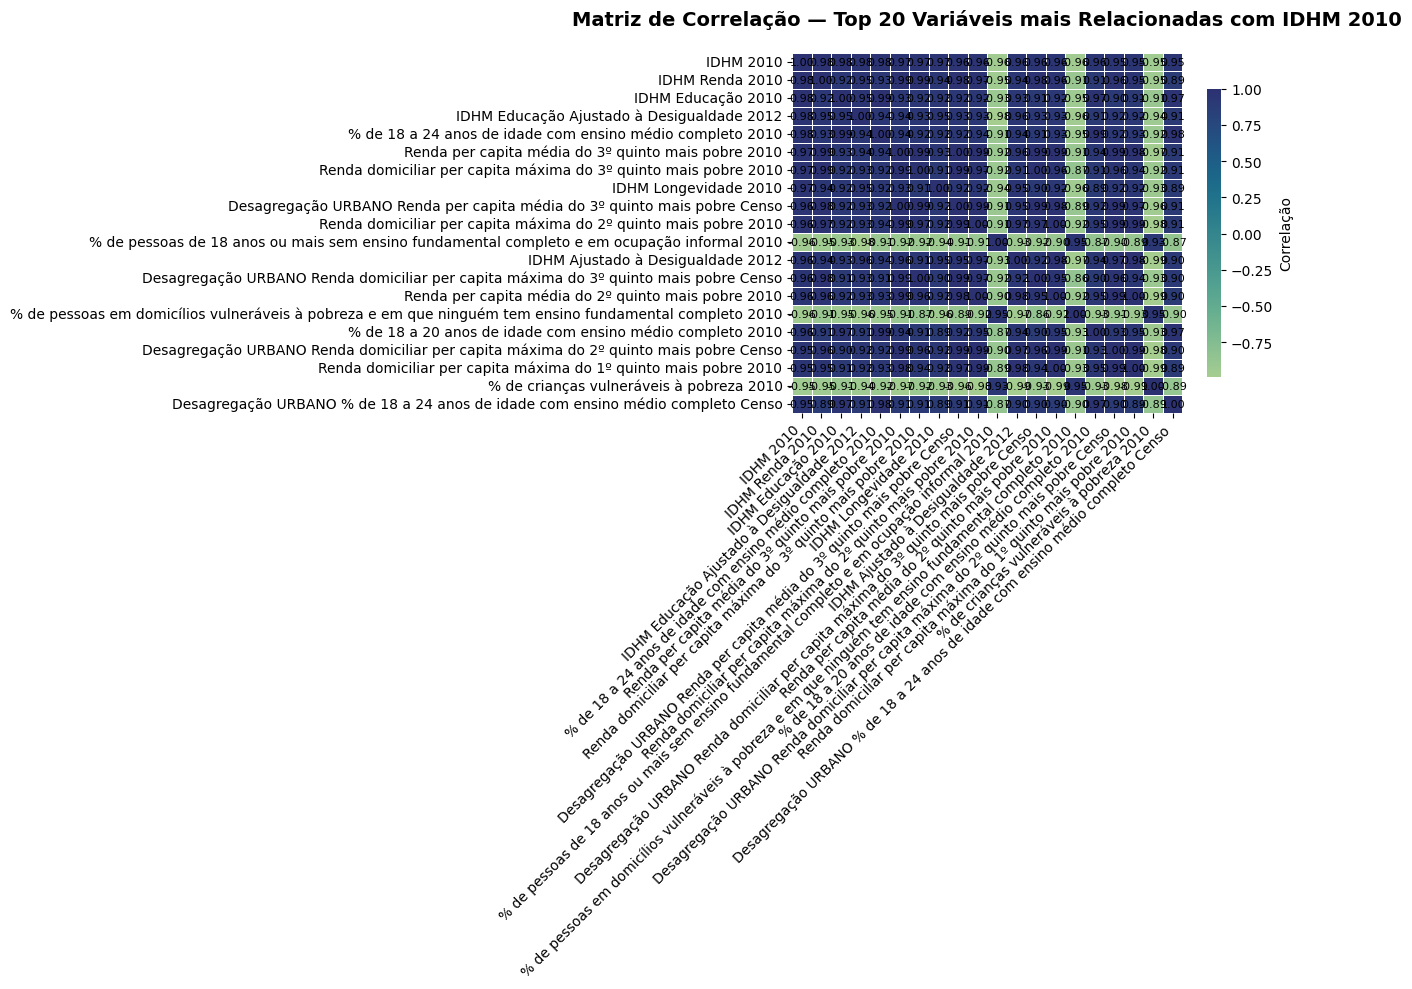

In [175]:
#  Selecionar colunas num√©ricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correla√ß√£o com 'IDHM 2010'
correlacoes = df_num.corrwith(df_num['IDHM 2010']).dropna()

#  Selecionar as 20 vari√°veis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correla√ß√£o
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correla√ß√£o"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correla√ß√£o ‚Äî Top 20 Vari√°veis mais Relacionadas com IDHM 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.1.1 Identifica√ß√£o de Vari√°veis Altamente Correlacionadas com o IDHM
Aqui √© feita uma an√°lise mais dirigida para descobrir **quais vari√°veis t√™m correla√ß√£o absoluta maior que 0.85** com o √≠ndice analisado.


In [176]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("‚úîÔ∏è Colunas duplicadas removidas.")

# Colunas de refer√™ncia
idh_cols = ['IDHM 2010', 'IDHM Educa√ß√£o 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010']

# Selecionar apenas colunas num√©ricas (exceto os pr√≥prios √≠ndices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correla√ß√£o com 'IDHM 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Vari√°vel', 'Correla√ß√£o (IDHM 2010)']

high_corr_vars = correlation_results[correlation_results['Correla√ß√£o (IDHM 2010)'].abs() >= 0.85]

print(f"\n=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM 2010 ===")
display(high_corr_vars)


‚úîÔ∏è Colunas duplicadas removidas.

=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Vari√°vel  Correla√ß√£o (IDHM 2010)
34   Sub√≠ndice de frequ√™ncia escolar - IDHM Educa√ß√£...                0.856867
35      Sub√≠ndice de escolaridade - IDHM Educa√ß√£o 2010                0.885821
84                   IDHM Ajustado √† Desigualdade 2012                0.960640
85       IDHM Longevidade Ajustado √† Desigualdade 2012                0.888334
86          IDHM Educa√ß√£o Ajustado √† Desigualdade 2012                0.976085
..                                                 ...                     ...
641  Desagrega√ß√£o RURAL % de crian√ßas que vivem em ...               -0.856767
646  Desagrega√ß√£o RURAL % de pessoas de 18 anos ou ...               -0.925286
647  Desagrega√ß√£o RURAL % de pessoas em domic√≠lios ...               -0.888410
663  Desagrega√ß√£o URBANO % de pessoas de 18 anos ou...               -0.919549
664  Desagrega√ß√£o URBANO % de pessoas em domic√≠lios...               -0.896385

[154 rows x 2 columns]

#### 5.1.2 Visualiza√ß√£o das Vari√°veis mais Correlacionadas
O gr√°fico abaixo destaca as vari√°veis com maior correla√ß√£o (positiva ou negativa) com o **IDHM 2010**.


/tmp/ipython-input-404654461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correla√ß√£o (IDHM 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')


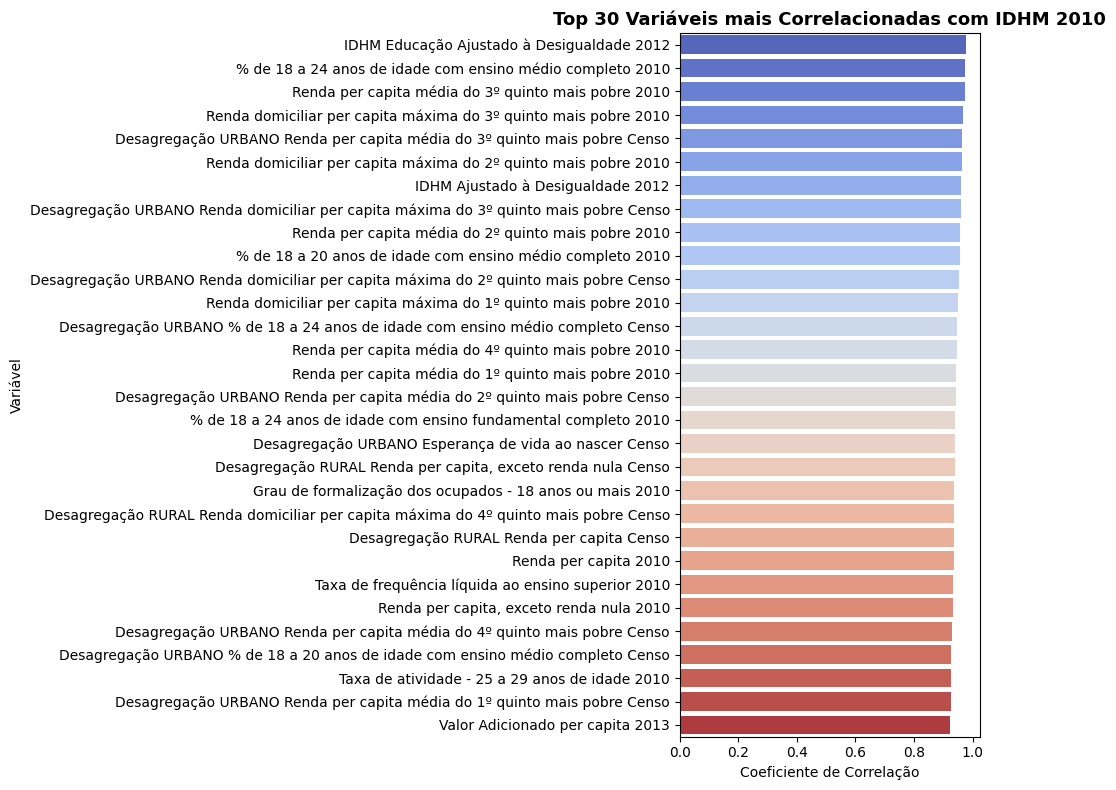

In [177]:
# Seleciona as 30 mais correlacionadas para visualiza√ß√£o
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correla√ß√£o (IDHM 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correla√ß√£o (IDHM 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Vari√°veis mais Correlacionadas com IDHM 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

Os fatores com maior correla√ß√£o com o IDHM total foram:

* % de 18 a 24 anos com ensino m√©dio completo,
* Renda per capita m√©dia dos quintos mais pobres
* IDHM ajustado √† desigualdade
* Grau de formaliza√ß√£o dos ocupados

O desenvolvimento humano no Brasil est√° profundamente ligado √† educa√ß√£o e √† formaliza√ß√£o do trabalho, refletindo que a desigualdade educacional e de renda √© um dos maiores limitadores de desenvolvimento. Regi√µes com maior acesso √† educa√ß√£o e empregos formais tendem a ter melhor IDH, mostrando o peso do capital humano no progresso regional

### 5.2 Correla√ß√£o ‚Äî IDHM Educa√ß√£o

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


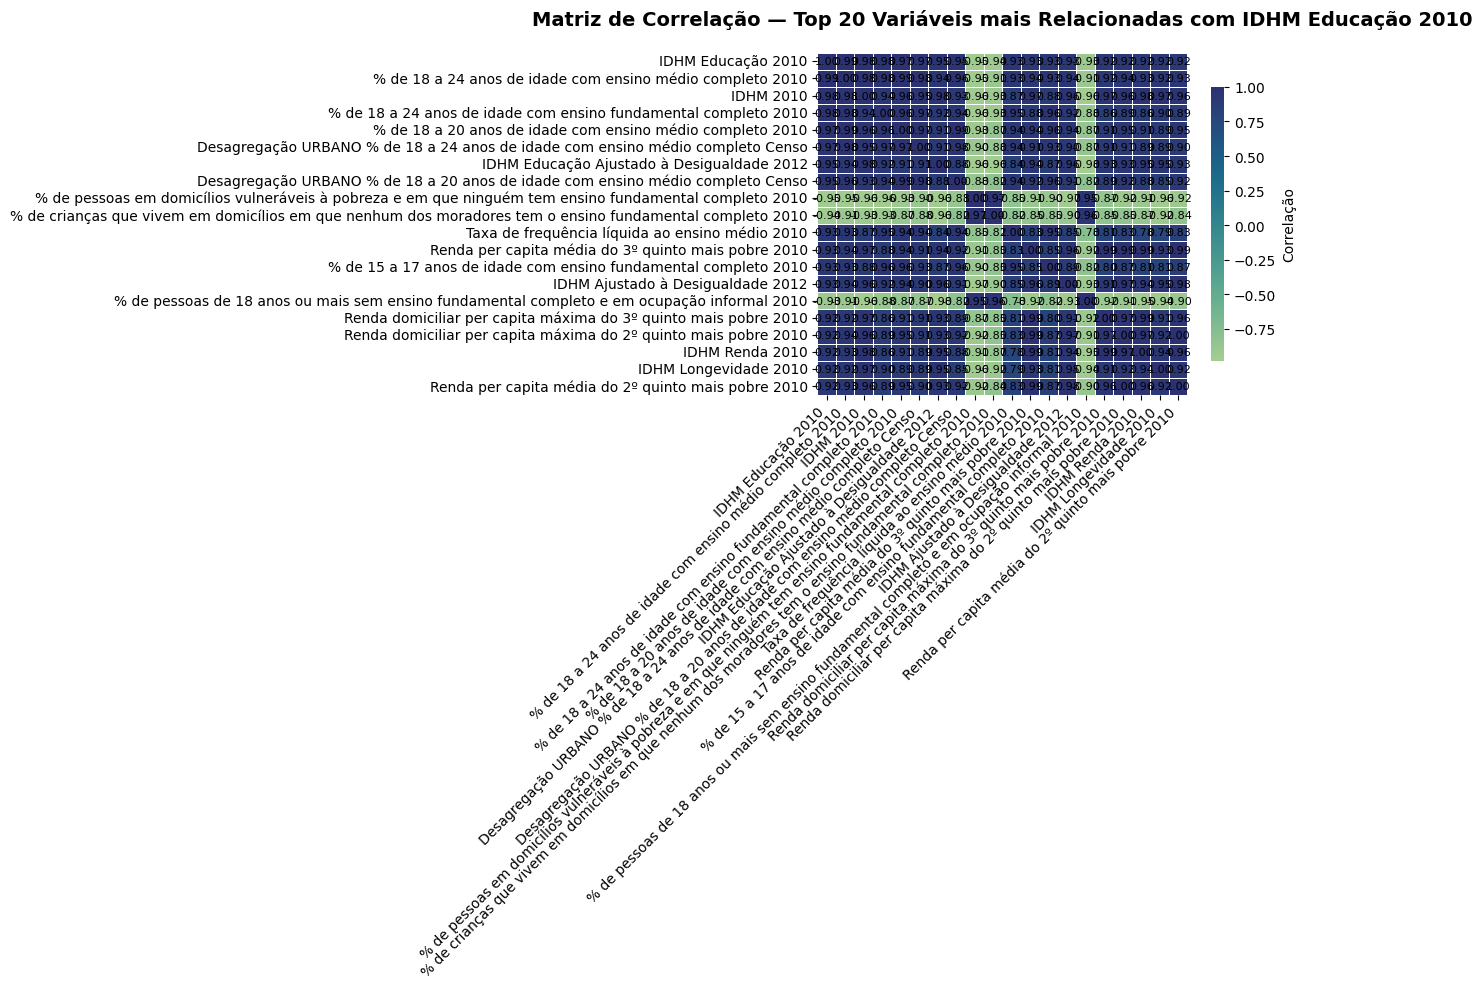

In [178]:
#  Selecionar colunas num√©ricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correla√ß√£o com 'IDHM Educa√ß√£o 2010'
correlacoes = df_num.corrwith(df_num['IDHM Educa√ß√£o 2010']).dropna()

#  Selecionar as 20 vari√°veis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correla√ß√£o
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correla√ß√£o"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correla√ß√£o ‚Äî Top 20 Vari√°veis mais Relacionadas com IDHM Educa√ß√£o 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.2.1 Identifica√ß√£o de Vari√°veis Altamente Correlacionadas com o IDHM Educacional
Aqui √© feita uma an√°lise mais dirigida para descobrir quais vari√°veis t√™m correla√ß√£o absoluta maior que 0.85 com o √≠ndice analisado.

In [179]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("‚úîÔ∏è Colunas duplicadas removidas.")

# Selecionar apenas colunas num√©ricas (exceto os pr√≥prios √≠ndices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correla√ß√£o com 'IDHM Educa√ß√£o 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Educa√ß√£o 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Vari√°vel', 'Correla√ß√£o (IDHM Educa√ß√£o 2010)']

high_corr_vars = correlation_results[correlation_results['Correla√ß√£o (IDHM Educa√ß√£o 2010)'].abs() >= 0.85]

print(f"\n=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Educa√ß√£o 2010 ===")
display(high_corr_vars)


‚úîÔ∏è Colunas duplicadas removidas.

=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Educa√ß√£o 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Vari√°vel  \
34   Sub√≠ndice de frequ√™ncia escolar - IDHM Educa√ß√£...   
35      Sub√≠ndice de escolaridade - IDHM Educa√ß√£o 2010   
84                   IDHM Ajustado √† Desigualdade 2012   
85       IDHM Longevidade Ajustado √† Desigualdade 2012   
86          IDHM Educa√ß√£o Ajustado √† Desigualdade 2012   
..                                                 ...   
644  Desagrega√ß√£o RURAL % de pessoas em domic√≠lios ...   
646  Desagrega√ß√£o RURAL % de pessoas de 18 anos ou ...   
647  Desagrega√ß√£o RURAL % de pessoas em domic√≠lios ...   
663  Desagrega√ß√£o URBANO % de pessoas de 18 anos ou...   
664  Desagrega√ß√£o URBANO % de pessoas em domic√≠lios...   

     Correla√ß√£o (IDHM Educa√ß√£o 2010)  
34                          0.911303  
35                          0.864501  
84                          0.925547  
85                          0.854835  
86                          0.952673  
..                               ...  
644                        -0.910720  
646                        -0.915251  
647                        -0.913208  
663                        -0.877028  
664                        -0.876463  

[112 rows x 2 columns]

#### 5.2.2 Visualiza√ß√£o das Vari√°veis mais Correlacionadas
O gr√°fico abaixo destaca as vari√°veis com maior correla√ß√£o (positiva ou negativa) com o **IDHM Educa√ß√£o 2010**.


/tmp/ipython-input-3545821359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correla√ß√£o (IDHM Educa√ß√£o 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')


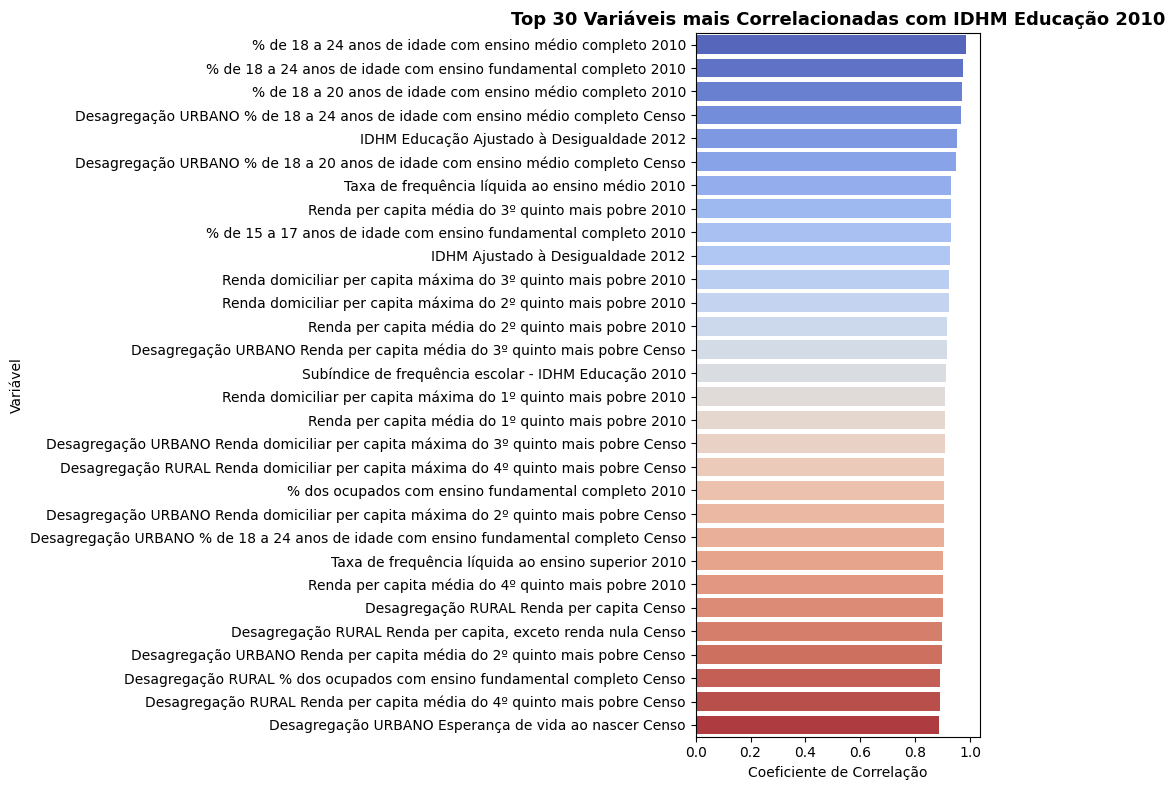

In [180]:
# Seleciona as 30 mais correlacionadas para visualiza√ß√£o
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correla√ß√£o (IDHM Educa√ß√£o 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correla√ß√£o (IDHM Educa√ß√£o 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Vari√°veis mais Correlacionadas com IDHM Educa√ß√£o 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

As vari√°veis mais correlacionadas foram:
* Taxas de conclus√£o do ensino m√©dio e fundamental
* Taxas de frequ√™ncia l√≠quida ao ensino m√©dio
* Sub√≠ndices de escolaridade e IDHM Educa√ß√£o ajustado √† desigualdade

A educa√ß√£o √© um ciclo refor√ßador: quanto mais acesso e perman√™ncia escolar, maior o √≠ndice educacional e o desenvolvimento geral. A forte presen√ßa de vari√°veis relacionadas √† faixa et√°ria de 18‚Äì24 anos indica a import√¢ncia da transi√ß√£o escolar-trabalho ‚Äî uma fase cr√≠tica em que desigualdades regionais ficam mais evidentes, principalmente no Norte e Nordeste.

### 5.3 Correla√ß√£o ‚Äî IDHM Renda

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


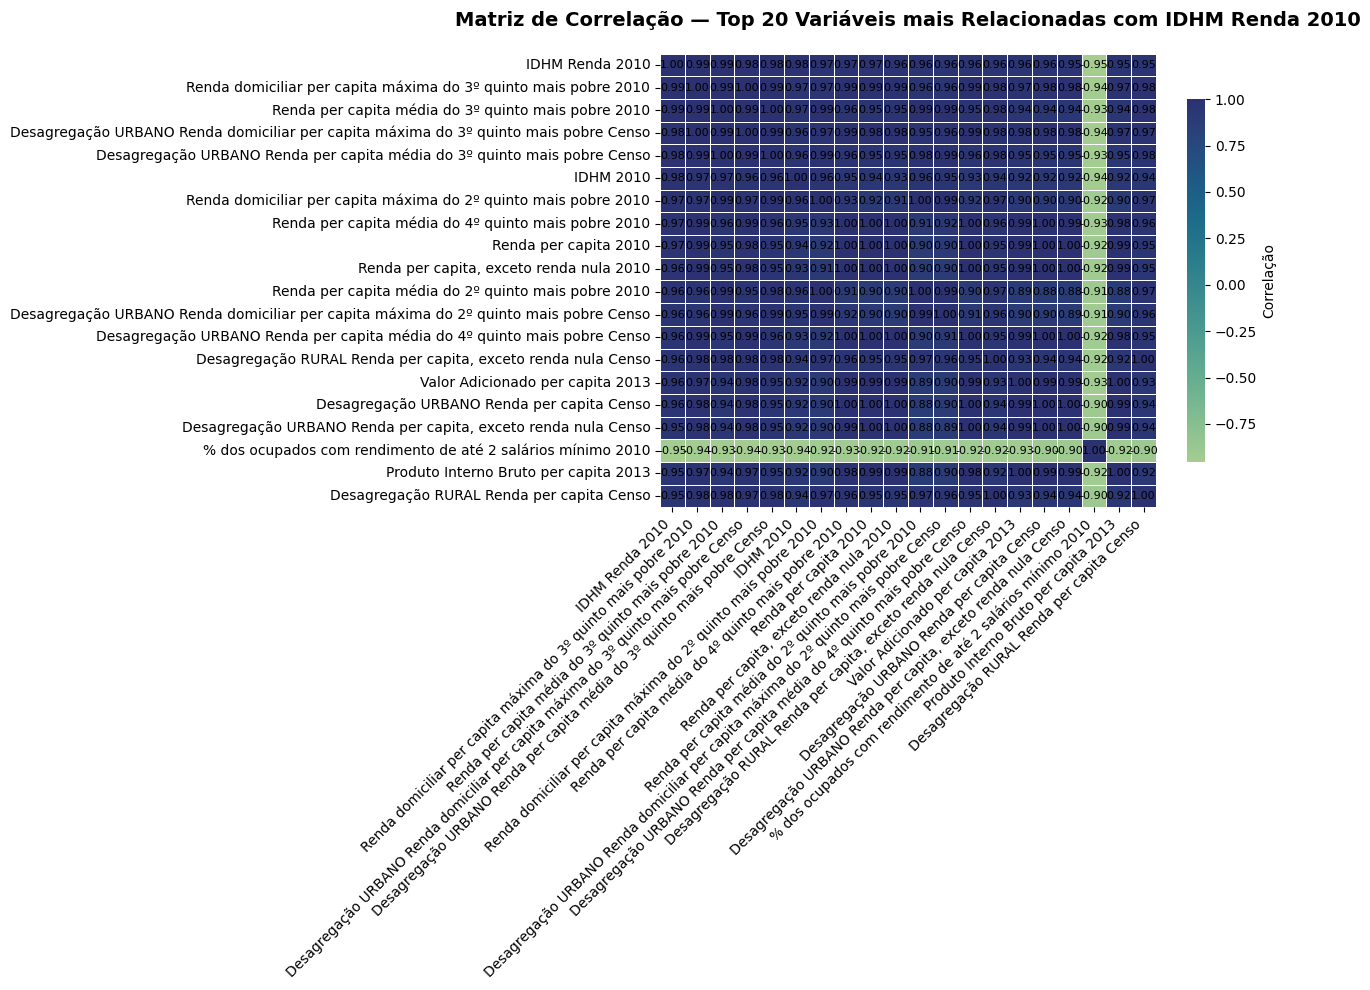

In [181]:
#  Selecionar colunas num√©ricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correla√ß√£o com 'IDHM Renda 2010'
correlacoes = df_num.corrwith(df_num['IDHM Renda 2010']).dropna()

#  Selecionar as 20 vari√°veis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correla√ß√£o
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correla√ß√£o"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correla√ß√£o ‚Äî Top 20 Vari√°veis mais Relacionadas com IDHM Renda 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.3.1 Identifica√ß√£o de Vari√°veis Altamente Correlacionadas com o IDHM Renda
Aqui √© feita uma an√°lise mais dirigida para descobrir quais vari√°veis t√™m correla√ß√£o absoluta maior que 0.85 com o √≠ndice analisado.

In [182]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("‚úîÔ∏è Colunas duplicadas removidas.")

# Selecionar apenas colunas num√©ricas (exceto os pr√≥prios √≠ndices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correla√ß√£o com 'IDHM Renda 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Renda 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Vari√°vel', 'Correla√ß√£o (IDHM Renda 2010)']

high_corr_vars = correlation_results[correlation_results['Correla√ß√£o (IDHM Renda 2010)'].abs() >= 0.85]

print(f"\n=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Renda 2010 ===")
display(high_corr_vars)


‚úîÔ∏è Colunas duplicadas removidas.

=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Renda 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Vari√°vel  \
35      Sub√≠ndice de escolaridade - IDHM Educa√ß√£o 2010   
84                   IDHM Ajustado √† Desigualdade 2012   
85       IDHM Longevidade Ajustado √† Desigualdade 2012   
86          IDHM Educa√ß√£o Ajustado √† Desigualdade 2012   
90   IDHM Educa√ß√£o Ajustado √† Desigualdade - Perda ...   
..                                                 ...   
634  % de pessoas inscritas no Cadastro √önico sem a...   
637  % de pessoas inscritas no Cadastro √önico sem c...   
638  % de pessoas inscritas no Cadastro √önico sem a...   
646  Desagrega√ß√£o RURAL % de pessoas de 18 anos ou ...   
663  Desagrega√ß√£o URBANO % de pessoas de 18 anos ou...   

     Correla√ß√£o (IDHM Renda 2010)  
35                       0.866044  
84                       0.941295  
85                       0.868709  
86                       0.950871  
90                      -0.875418  
..                            ...  
634                     -0.859071  
637                     -0.886747  
638                     -0.859071  
646                     -0.914453  
663                     -0.912803  

[133 rows x 2 columns]

#### 5.3.2 Visualiza√ß√£o das Vari√°veis mais Correlacionadas
O gr√°fico abaixo destaca as vari√°veis com maior correla√ß√£o (positiva ou negativa) com o **IDHM Renda 2010**.

/tmp/ipython-input-3787986602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correla√ß√£o (IDHM Renda 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')


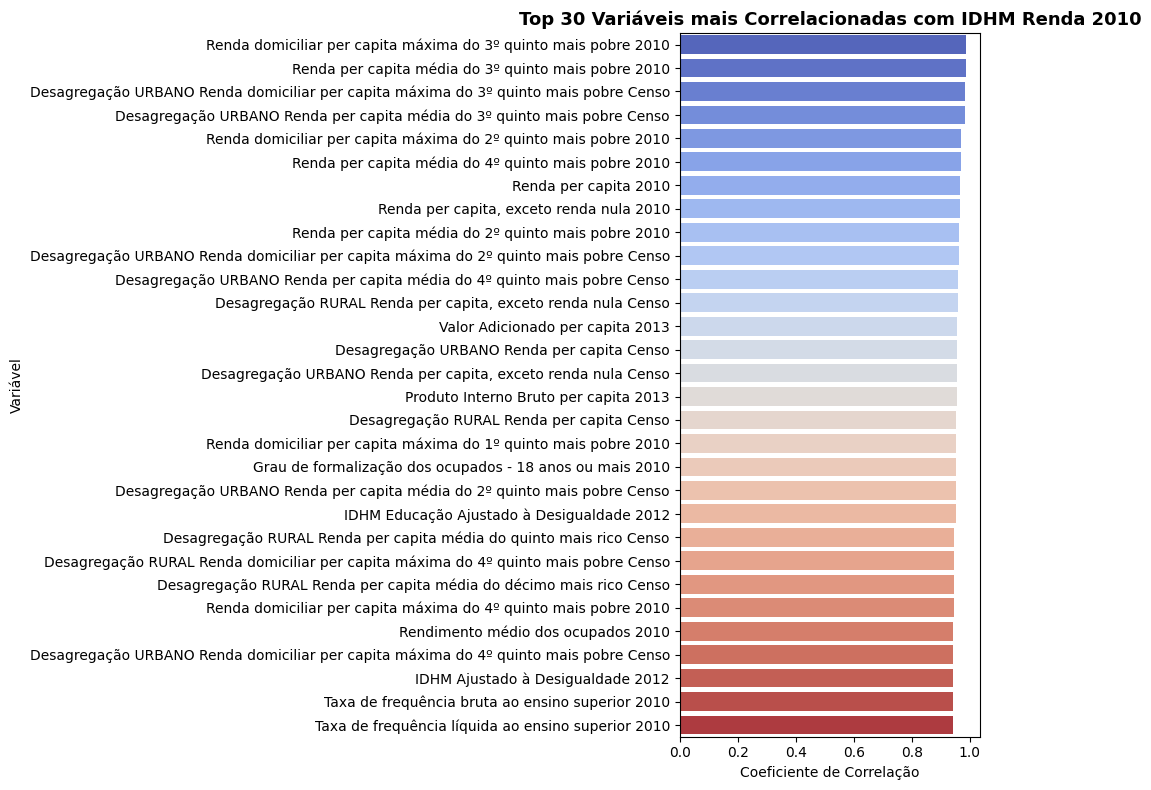

In [183]:
# Seleciona as 30 mais correlacionadas para visualiza√ß√£o
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correla√ß√£o (IDHM Renda 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correla√ß√£o (IDHM Renda 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Vari√°veis mais Correlacionadas com IDHM Renda 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

Aqui aparecem como fatores dominantes:
* Renda per capita e domiciliar
* Rendimento m√©dio dos ocupados
* Produto Interno Bruto per capita
* Formaliza√ß√£o dos trabalhadores

O componente de renda √© o mais diretamente econ√¥mico, e as correla√ß√µes revelam que a desigualdade intrarregional (ex: diferen√ßa entre quintis mais ricos e mais pobres) pesa muito.
Isso mostra que n√£o √© apenas a riqueza total que importa, mas sua distribui√ß√£o, estados com melhor equil√≠brio entre os quintis t√™m melhor desempenho socioecon√¥mico.

### 5.4 Correla√ß√£o ‚Äî IDHM Longevidade

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


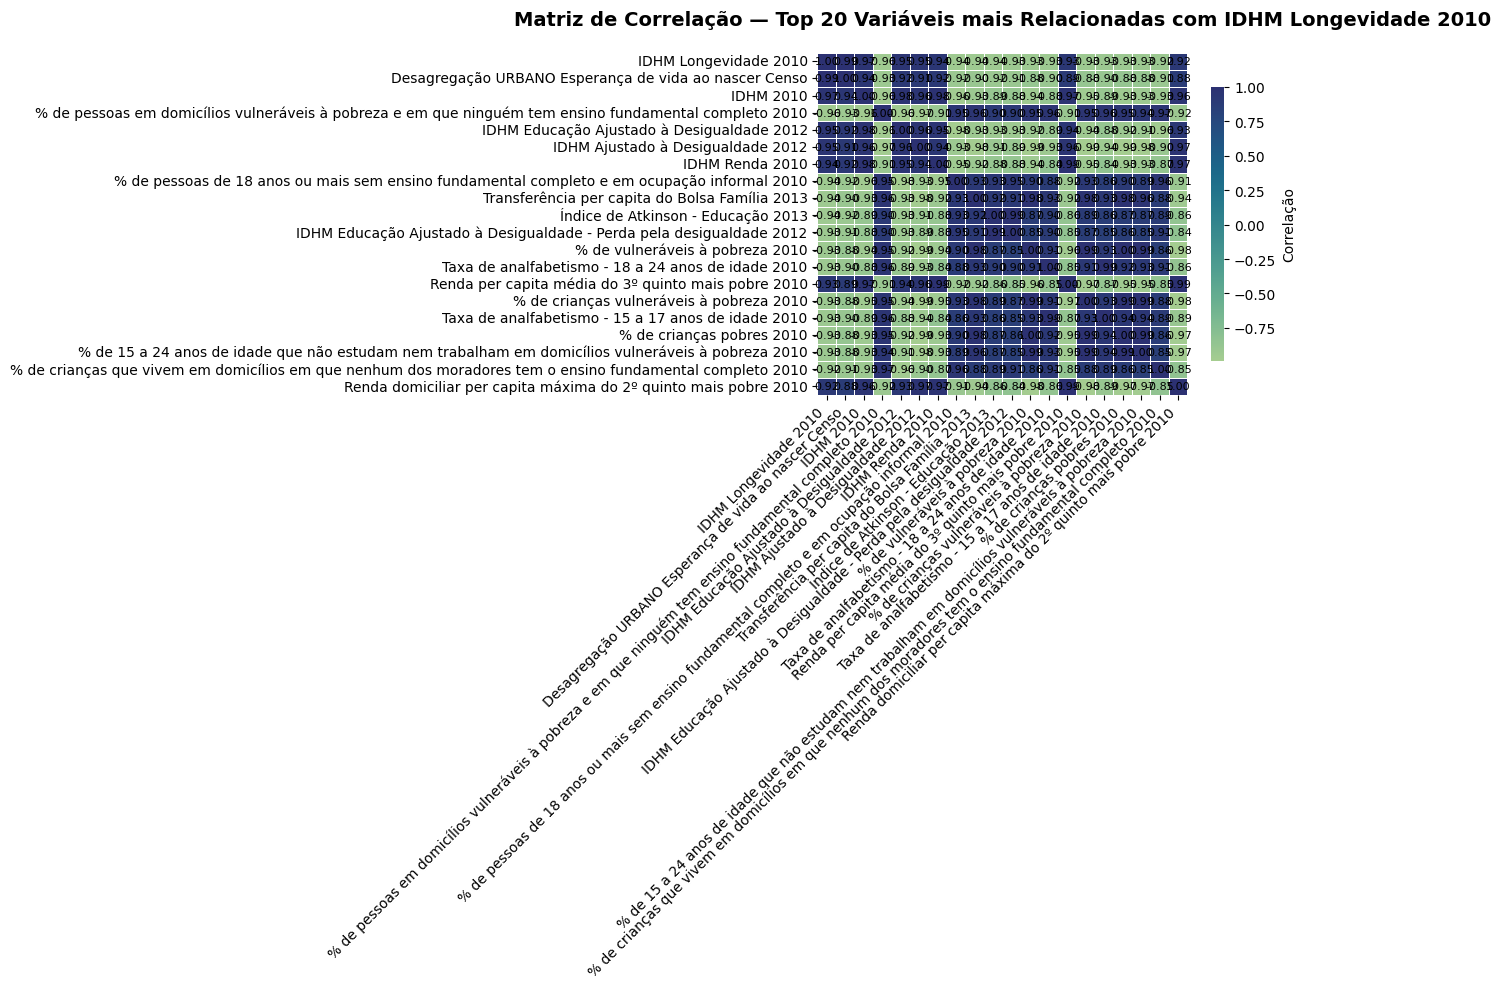

In [184]:
#  Selecionar colunas num√©ricas
df_num = df_unificado.select_dtypes(include=['number']).copy()

#  Calcular correla√ß√£o com 'IDHM Longevidade 2010'
correlacoes = df_num.corrwith(df_num['IDHM Longevidade 2010']).dropna()

#  Selecionar as 20 vari√°veis mais correlacionadas (positiva/negativa)
top20 = correlacoes.abs().sort_values(ascending=False).head(20)
top20_cols = top20.index.tolist()

#  Gerar matriz de correla√ß√£o
corr_matrix = df_num[top20_cols].corr()

#  Plotar heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(
    corr_matrix,
    cmap="crest",
    annot=True,
    fmt=".2f",
    linewidths=.7,
    cbar_kws={"shrink": .8, "label": "Correla√ß√£o"},
    annot_kws={"size":8, "color":"black"}
)

plt.title("Matriz de Correla√ß√£o ‚Äî Top 20 Vari√°veis mais Relacionadas com IDHM Longevidade 2010", fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.4.1 Identifica√ß√£o de Vari√°veis Altamente Correlacionadas com o IDHM Longevidade
Aqui √© feita uma an√°lise mais dirigida para descobrir quais vari√°veis t√™m correla√ß√£o absoluta maior que 0.85 com o √≠ndice analisado.

In [185]:
# Definir o DataFrame base
df = df_unificado.copy()
df = df.loc[:, ~df.columns.duplicated(keep='first')]
print("‚úîÔ∏è Colunas duplicadas removidas.")

# Selecionar apenas colunas num√©ricas (exceto os pr√≥prios √≠ndices)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in idh_cols]

# Calcular correla√ß√£o com 'IDHM Longevidade 2010'
correlations_with_idhm = df[numeric_cols].apply(lambda x: x.corr(df['IDHM Longevidade 2010']))

# Transformar em DataFrame e filtrar valores altos
correlation_results = correlations_with_idhm.reset_index()
correlation_results.columns = ['Vari√°vel', 'Correla√ß√£o (IDHM Longevidade 2010)']

high_corr_vars = correlation_results[correlation_results['Correla√ß√£o (IDHM Longevidade 2010)'].abs() >= 0.85]

print(f"\n=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Longevidade 2010 ===")
display(high_corr_vars)


‚úîÔ∏è Colunas duplicadas removidas.

=== Vari√°veis com |Correla√ß√£o| ‚â• 0.85 com IDHM Longevidade 2010 ===


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Vari√°vel  \
4                            Mortalidade infantil 2010   
15                Mortalidade at√© 5 anos de idade 2010   
35      Sub√≠ndice de escolaridade - IDHM Educa√ß√£o 2010   
84                   IDHM Ajustado √† Desigualdade 2012   
85       IDHM Longevidade Ajustado √† Desigualdade 2012   
..                                                 ...   
637  % de pessoas inscritas no Cadastro √önico sem c...   
638  % de pessoas inscritas no Cadastro √önico sem a...   
646  Desagrega√ß√£o RURAL % de pessoas de 18 anos ou ...   
663  Desagrega√ß√£o URBANO % de pessoas de 18 anos ou...   
664  Desagrega√ß√£o URBANO % de pessoas em domic√≠lios...   

     Correla√ß√£o (IDHM Longevidade 2010)  
4                             -0.905808  
15                            -0.867718  
35                             0.864448  
84                             0.953978  
85                             0.891211  
..                                  ...  
637                           -0.860561  
638                           -0.856507  
646                           -0.852809  
663                           -0.913780  
664                           -0.917755  

[119 rows x 2 columns]

#### 5.4.2 Visualiza√ß√£o das Vari√°veis mais Correlacionadas
O gr√°fico abaixo destaca as vari√°veis com maior correla√ß√£o (positiva ou negativa) com o **IDHM Longevidade 2010**.

/tmp/ipython-input-2163964855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correla√ß√£o (IDHM Longevidade 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')


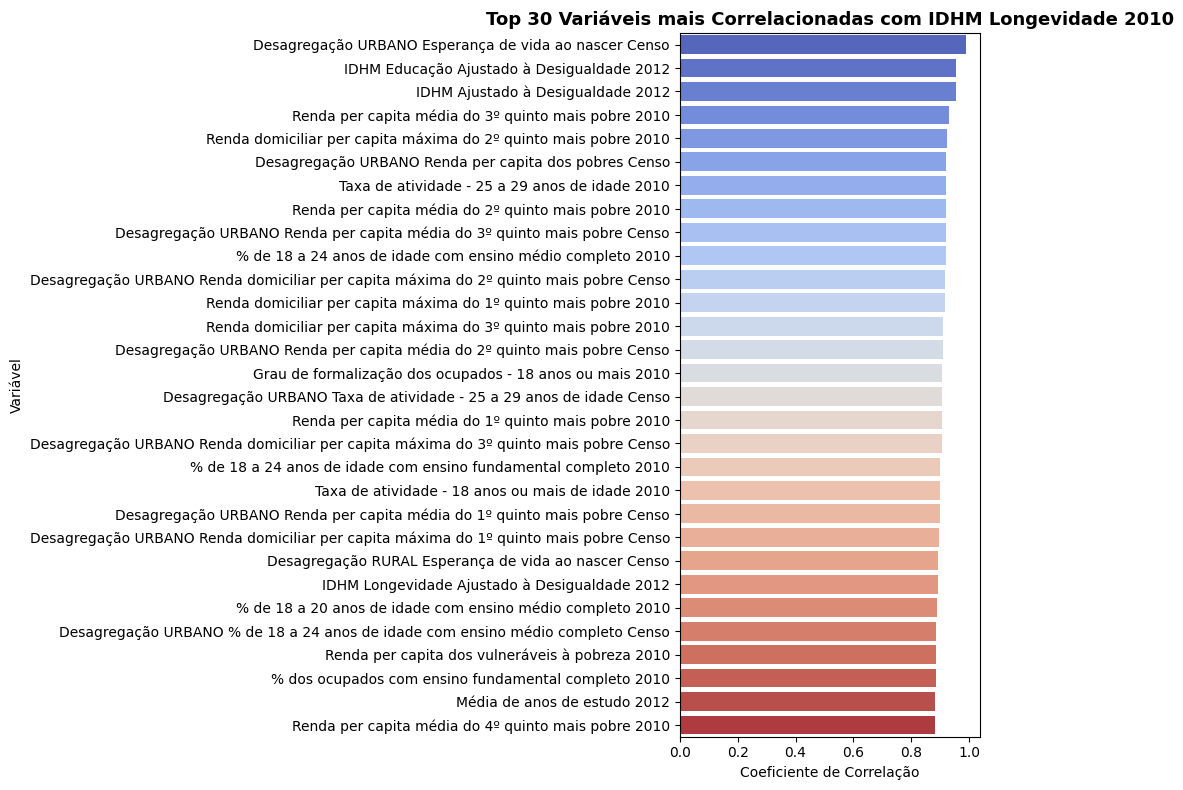

In [186]:
# Seleciona as 30 mais correlacionadas para visualiza√ß√£o
high_corr_vars_sorted = high_corr_vars.sort_values(by='Correla√ß√£o (IDHM Longevidade 2010)', ascending=False).head(30)

plt.figure(figsize=(10, 8))
sns.barplot(x='Correla√ß√£o (IDHM Longevidade 2010)', y='Vari√°vel', data=high_corr_vars_sorted, palette='coolwarm')
plt.title('Top 30 Vari√°veis mais Correlacionadas com IDHM Longevidade 2010', fontsize=13, weight='bold')
plt.xlabel('Coeficiente de Correla√ß√£o')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

As vari√°veis com maior correla√ß√£o foram:
* Esperan√ßa de vida ao nascer
* Renda per capita m√©dia dos quintis intermedi√°rios
* Formaliza√ß√£o do trabalho
* IDHM ajustado √† desigualdade

A longevidade √© fortemente impactada por condi√ß√µes de renda e estabilidade econ√¥mica. Isso evidencia a conex√£o entre sa√∫de, renda e infraestrutura urbana, refor√ßando como as condi√ß√µes de vida e o acesso a servi√ßos b√°sicos variam drasticamente entre regi√µes, refletindo a diversidade e desigualdade brasileira.

## Conclus√£o

A partir da integra√ß√£o e an√°lise dos oito conjuntos de dados socioecon√¥micos dos estados brasileiros, foi poss√≠vel identificar de forma clara os **principais agentes que influenciam o desenvolvimento humano no Brasil**. A an√°lise das matrizes de correla√ß√£o revelou que os indicadores de **educa√ß√£o, renda e formaliza√ß√£o do trabalho** apresentam as rela√ß√µes mais fortes com os √≠ndices de desenvolvimento humano (IDHM), especialmente em suas dimens√µes de **educa√ß√£o, renda e longevidade**.

Os resultados mostraram que:
- **Educa√ß√£o** √© o fator mais recorrente e decisivo, refletindo-se em altas correla√ß√µes entre taxas de escolaridade, frequ√™ncia escolar e o pr√≥prio IDHM.  
- **Renda e formaliza√ß√£o** do trabalho demonstram impacto direto na qualidade de vida e na longevidade, indicando que a estabilidade econ√¥mica √© determinante para o desenvolvimento.  
- **Desigualdade regional e distributiva** permanece como um desafio central: mesmo em estados com crescimento econ√¥mico, a concentra√ß√£o de renda ainda limita avan√ßos em outras dimens√µes sociais.

Esses achados refor√ßam que o desenvolvimento humano no Brasil √© **multifatorial e profundamente desigual no territ√≥rio**. Enquanto regi√µes do Sul e Sudeste apresentam indicadores fortemente associados √† educa√ß√£o e renda formal, o Norte e Nordeste ainda enfrentam desafios estruturais que reduzem o alcance do desenvolvimento humano pleno.

Do ponto de vista metodol√≥gico, o uso de **an√°lises de correla√ß√£o** se mostrou eficaz para identificar vari√°veis-chave e direcionar investiga√ß√µes mais profundas. Em etapas futuras, pretendo fazer a aplica√ß√£o de **modelos preditivos (como regress√µes m√∫ltiplas ou algoritmos de machine learning)** e **visualiza√ß√µes geogr√°ficas** para prever tend√™ncias e mapear espacialmente as desigualdades, ampliando a compreens√£o dos fen√¥menos socioecon√¥micos.

Em s√≠ntese, o projeto evidencia que **educa√ß√£o de qualidade, equidade de renda e trabalho formal** s√£o pilares indispens√°veis para a melhoria dos √≠ndices socioecon√¥micos brasileiros. Compreender como esses fatores interagem em diferentes regi√µes √© fundamental para orientar **pol√≠ticas p√∫blicas mais justas e eficazes**, voltadas √† redu√ß√£o das desigualdades e √† promo√ß√£o de um desenvolvimento verdadeiramente inclusivo.
